In [1]:
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv("dataset/train.csv", sep=',', parse_dates=[2])

df

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [2]:
# LR input
inputData = pd.DataFrame(df, columns=["Promo"])
inputData = sm.add_constant(inputData, has_constant='add')
targetData = pd.DataFrame(df, columns=["Sales"])

# Run LR
model = sm.OLS(targetData, inputData).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                 2.617e+05
Date:                Mon, 21 May 2018   Prob (F-statistic):               0.00
Time:                        22:18:19   Log-Likelihood:            -9.7248e+06
No. Observations:             1017209   AIC:                         1.945e+07
Df Residuals:                 1017207   BIC:                         1.945e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4406.0508      4.329   1017.837      0.000    4397.566    4414.535
Promo       3585.1012      7.008    511.547      0.000    3571.365    3598.837
==============================================================================
Omnibus:                   158582.717   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434325.378
Skew:                           0.851   Prob(JB):                         0.00
Kurtosis:                       5.712   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
df.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000


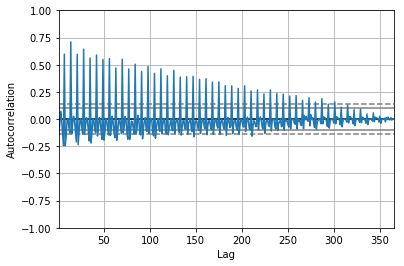

In [18]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

store_one_sales = df.loc[df['Store'] == 1.0].sort_values(by='Date')

autocorrelation_plot(store_one_sales['Sales'].head(365))
pyplot.show()

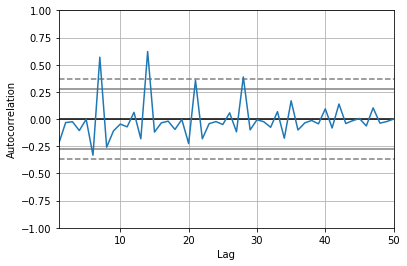

'\nWe see that there is a periodicity here with period of 7 days, meaning we have a high correlation between the same days\nof the weeks. For example, Monday of week t is correlated with Monday of t-7, t-14 and such. We can capture that\ncorrelation by adding t-7 feature.\n'

In [23]:
autocorrelation_plot(store_one_sales['Sales'].head(50))
pyplot.show()

'''
We see that there is a periodicity here with period of 7 days, meaning we have a high correlation between the same days
of the weeks. For example, Monday of week t is correlated with Monday of t-7, t-14 and such. We can capture that
correlation by adding t-7 feature.
'''